In [225]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.set_printoptions(precision=4, suppress=True)  # Zaokrúhliť a vypnúť zobrazenie veľmi malých čísel


In [226]:
t = np.array([0, 1, 2, 3, 4])
tt = np.linspace(0, t[-1], 100)

f = np.array([0, 0.5, 1, 4, 8])


---

## Jednoparametricke

### $y(t) = c \cdot t$

,0,1,2,3,4
t,0.0,1.0000,2.00,3.0000,4.00
f,0.0,0.5000,1.00,4.0000,8.00
b,0.0,1.0000,2.00,3.0000,4.00
fp,0.0,1.5500,3.10,4.6500,6.20
f-fp,0.0,-1.0500,-2.10,-0.6500,1.80
^2,0.0,1.1025,4.41,0.4225,3.24


c = 1.55
chyba = 3.029026246172192 (0.6058052492344383 per prvok)


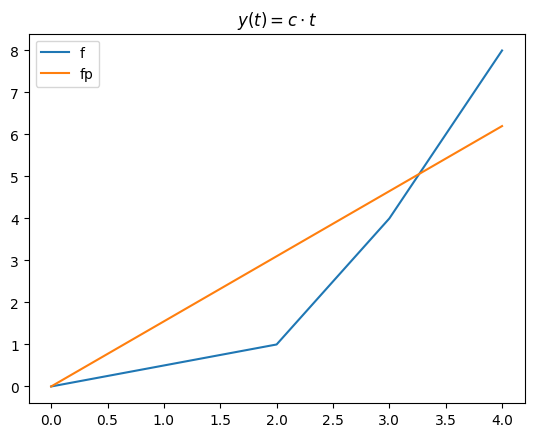

In [227]:
b = t
c = np.dot(f, b) / np.dot(b, b)
fp = c * b
chyba = np.sqrt(sum(np.pow(f - fp, 2)))

df = pd.DataFrame([t, f, b, fp, f-fp, np.pow(f-fp, 2)], index=["t", "f", "b", "fp", "f-fp", "^2"])
display(df)
print(f"c = {c}")
print(f"chyba = {chyba} ({chyba/len(f)} per prvok)")

plt.plot(f, label="f")
plt.plot(fp, label="fp")
plt.title("$y(t) = c \\cdot t$")
_ = plt.legend()


### $y(t) = c \cdot t^2$

,0,1,2,3,4
t,0.0,1.000000,2.000000,3.000000,4.000000
f,0.0,0.500000,1.000000,4.000000,8.000000
b,0.0,1.000000,4.000000,9.000000,16.000000
fp,0.0,0.475989,1.903955,4.283898,7.615819
f-fp,0.0,0.024011,-0.903955,-0.283898,0.384181
^2,0.0,0.000577,0.817134,0.080598,0.147595


c = 0.4759887005649718
chyba = 1.022694458184975 (0.204538891636995 per prvok)


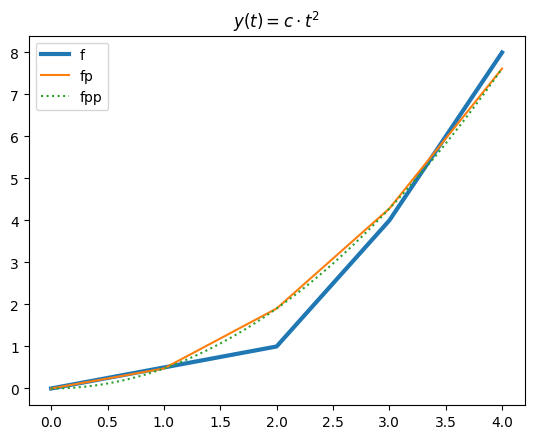

In [228]:
b = np.pow(t, 2)
c = np.dot(f, b) / np.dot(b, b)
fp = c * b
chyba = np.sqrt(sum(np.pow(f - fp, 2)))

df = pd.DataFrame([t, f, b, fp, f-fp, np.pow(f-fp, 2)], index=["t", "f", "b", "fp", "f-fp", "^2"])
display(df)
print(f"c = {c}")
print(f"chyba = {chyba} ({chyba/len(f)} per prvok)")

bb = np.pow(tt, 2)
y = c * bb

plt.plot(f, label="f", linewidth=3)
plt.plot(fp, label="fp")
plt.plot(tt, y, ":", label="fpp")
plt.title("$y(t) = c \\cdot t^2$")
_ = plt.legend()


### $y(t) = c \cdot t^3$

,0,1,2,3,4
t,0.0,1.000000,2.000000,3.000000,4.000000
f,0.0,0.500000,1.000000,4.000000,8.000000
b,0.0,1.000000,8.000000,27.000000,64.000000
fp,0.0,0.128528,1.028221,3.470245,8.225767
f-fp,0.0,0.371472,-0.028221,0.529755,-0.225767
^2,0.0,0.137992,0.000796,0.280640,0.050971


c = 0.1285276073619632
chyba = 0.685856233482014 (0.1371712466964028 per prvok)


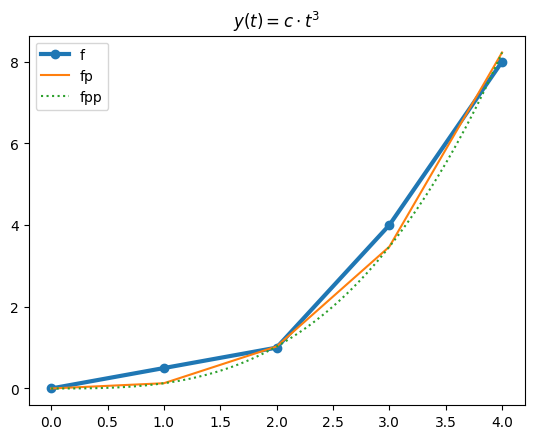

In [229]:
b = np.pow(t, 3)
c = np.dot(f, b) / np.dot(b, b)
fp = c * b
chyba = np.sqrt(sum(np.pow(f - fp, 2)))

df = pd.DataFrame([t, f, b, fp, f-fp, np.pow(f-fp, 2)], index=["t", "f", "b", "fp", "f-fp", "^2"])
display(df)
print(f"c = {c}")
print(f"chyba = {chyba} ({chyba/len(f)} per prvok)")

bb = np.pow(tt, 3)
cc = np.dot(f, b) / np.dot(b, b)
fpp = cc * bb

plt.plot(f, "o-", label="f", linewidth=3)
plt.plot(fp, label="fp")
plt.plot(tt, fpp, ":", label="fpp")
plt.title("$y(t) = c \\cdot t^3$")
_ = plt.legend()


---
## Dvojparametricke

### $y(t) = a + b \cdot t$

$c_0 \cdot \langle \mathbf{b_0}, \mathbf{b_0} \rangle + c_1 \cdot \langle \mathbf{b_1}, \mathbf{b_0} \rangle = \langle \mathbf{f}, \mathbf{b_0} \rangle$

$c_0 \cdot \langle \mathbf{b_0}, \mathbf{b_1} \rangle + c_1 \cdot \langle \mathbf{b_1}, \mathbf{b_1} \rangle = \langle \mathbf{f}, \mathbf{b_1} \rangle$


,0,1,2,3,4
t,0.00,1.0000,2.00,3.0000,4.00
f,0.00,0.5000,1.00,4.0000,8.00
b0,1.00,1.0000,1.00,1.0000,1.00
b1,0.00,1.0000,2.00,3.0000,4.00
fp,-1.20,0.7500,2.70,4.6500,6.60
f-fp,1.20,-0.2500,-1.70,-0.6500,1.40
^2,1.44,0.0625,2.89,0.4225,1.96


c0 = -1.1999999999999997
c1 = 1.95
chyba = 2.6028830169640744 (0.5205766033928149 per prvok)


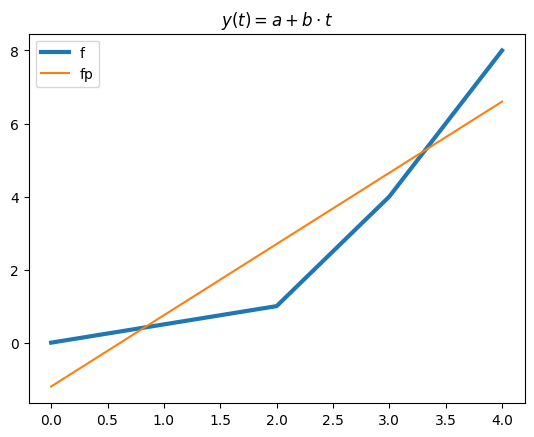

In [230]:
b0 = np.ones(len(t))
b1 = t

A = np.array([[np.dot(b0, b0), np.dot(b1, b0)], [np.dot(b0, b1), np.dot(b1, b1)]])
b = np.array([np.dot(f, b0), np.dot(f, b1)])
c0, c1 = np.linalg.solve(A, b)

fp = np.dot(c0, b0) + np.dot(c1, b1) # fp = c0*b0 + c1*b1
chyba = np.sqrt(sum(np.pow(f - fp, 2)))

df = pd.DataFrame([t, f, b0, b1, fp, f-fp, np.pow(f-fp, 2)], index=["t", "f", "b0", "b1", "fp", "f-fp", "^2"])
display(df)
print(f"c0 = {c0}\nc1 = {c1}")
print(f"chyba = {chyba} ({chyba/len(f)} per prvok)")

plt.plot(f, label="f", linewidth=3)
plt.plot(fp, label="fp")
# plt.plot(tt, fpp, ":", label="fpp")
plt.title("$y(t) = a + b \\cdot t$")
_ = plt.legend()



### $y(t) = a + b \cdot t^2$

$c_0 \cdot \langle \mathbf{b_0}, \mathbf{b_0} \rangle + c_1 \cdot \langle \mathbf{b_1}, \mathbf{b_0} \rangle = \langle \mathbf{f}, \mathbf{b_0} \rangle$

$c_0 \cdot \langle \mathbf{b_0}, \mathbf{b_1} \rangle + c_1 \cdot \langle \mathbf{b_1}, \mathbf{b_1} \rangle = \langle \mathbf{f}, \mathbf{b_1} \rangle$


,0,1,2,3,4
t,0.000000,1.000000,2.000000,3.000000,4.000000
f,0.000000,0.500000,1.000000,4.000000,8.000000
b0,1.000000,1.000000,1.000000,1.000000,1.000000
b1,0.000000,1.000000,4.000000,9.000000,16.000000
fp,-0.317241,0.185632,1.694253,4.208621,7.728736
f-fp,0.317241,0.314368,-0.694253,-0.208621,0.271264
^2,0.100642,0.098827,0.481987,0.043523,0.073584


c0 = -0.3172413793103438
c1 = 0.5028735632183907
chyba = 0.8936236447133685 (0.17872472894267372 per prvok)


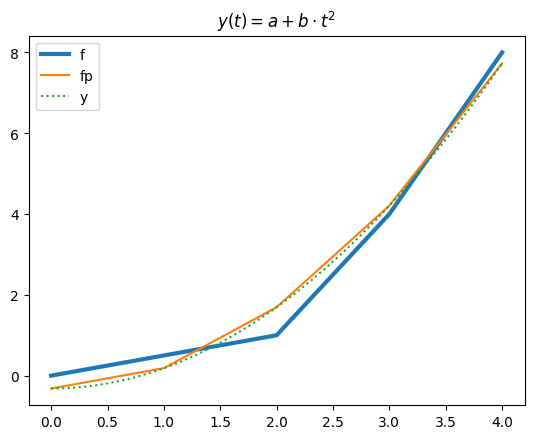

In [231]:
b0 = np.ones(len(t))
b1 = np.pow(t, 2)

A = np.array([[np.dot(b0, b0), np.dot(b1, b0)], [np.dot(b0, b1), np.dot(b1, b1)]])
b = np.array([np.dot(f, b0), np.dot(f, b1)])
c0, c1 = np.linalg.solve(A, b)

fp = np.dot(c0, b0) + np.dot(c1, b1) # fp = c0*b0 + c1*b1
chyba = np.sqrt(sum(np.pow(f - fp, 2)))

df = pd.DataFrame([t, f, b0, b1, fp, f-fp, np.pow(f-fp, 2)], index=["t", "f", "b0", "b1", "fp", "f-fp", "^2"])
display(df)
print(f"c0 = {c0}\nc1 = {c1}")
print(f"chyba = {chyba} ({chyba/len(f)} per prvok)")

y = np.dot(c0, np.ones(len(tt))) + np.dot(c1, np.pow(tt, 2)) # fp = c0*b0 + c1*b1

plt.plot(f, label="f", linewidth=3)
plt.plot(fp, label="fp")
plt.plot(tt, y, ":", label="y")
plt.title("$y(t) = a + b \\cdot t^2$")
_ = plt.legend()


---

## Trojparametricke

### $y(t) = a + b \cdot t + c \cdot t^2$

$c_0 \cdot \langle \mathbf{b_0}, \mathbf{b_0} \rangle + c_1 \cdot \langle \mathbf{b_1}, \mathbf{b_0} \rangle + c_2 \cdot \langle \mathbf{b_2}, \mathbf{b_0} \rangle = \langle \mathbf{f}, \mathbf{b_0} \rangle$

$c_0 \cdot \langle \mathbf{b_0}, \mathbf{b_1} \rangle + c_1 \cdot \langle \mathbf{b_1}, \mathbf{b_1} \rangle + c_2 \cdot \langle \mathbf{b_2}, \mathbf{b_1} \rangle = \langle \mathbf{f}, \mathbf{b_1} \rangle$

$c_0 \cdot \langle \mathbf{b_0}, \mathbf{b_2} \rangle + c_1 \cdot \langle \mathbf{b_1}, \mathbf{b_2} \rangle + c_2 \cdot \langle \mathbf{b_2}, \mathbf{b_2} \rangle = \langle \mathbf{f}, \mathbf{b_2} \rangle$




0.15714285714285597 -0.7642857142857105 0.6785714285714276


,0,1,2,3,4
t,0.000000,1.000000,2.000000,3.000000,4.000000
f,0.000000,0.500000,1.000000,4.000000,8.000000
b0,1.000000,1.000000,1.000000,1.000000,1.000000
b1,0.000000,1.000000,2.000000,3.000000,4.000000
b2,0.000000,1.000000,4.000000,9.000000,16.000000
fp,0.157143,0.071429,1.342857,3.971429,7.957143
f-fp,-0.157143,0.428571,-0.342857,0.028571,0.042857
^2,0.024694,0.183673,0.117551,0.000816,0.001837


c0 = 0.15714285714285597
c1 = -0.7642857142857105
c2 = 0.6785714285714276
chyba = 0.5732115042211108 (0.11464230084422215 per prvok)


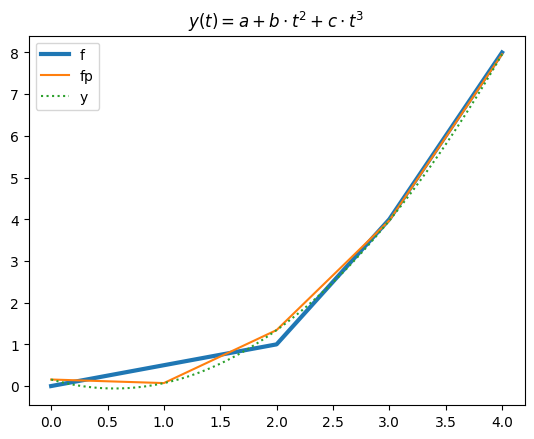

In [232]:
b0 = np.pow(t, 0)
b1 = np.pow(t, 1)
b2 = np.pow(t, 2)

A = np.array([
    [np.dot(b0, b0), np.dot(b1, b0), np.dot(b2, b0)],
    [np.dot(b0, b1), np.dot(b1, b1), np.dot(b2, b1)],
    [np.dot(b0, b2), np.dot(b1, b2), np.dot(b2, b2)]
])

b = np.array([
    np.dot(f, b0),
    np.dot(f, b1),
    np.dot(f, b2)]
)

c0, c1, c2 = np.linalg.solve(A, b)

print(c0, c1, c2)

fp = np.dot(c0, b0) + np.dot(c1, b1) + np.dot(c2, b2) # fp = c0*b0 + c1*b1 + c2*b2
chyba = np.sqrt(sum(np.pow(f - fp, 2)))

df = pd.DataFrame([t, f, b0, b1, b2, fp, f-fp, np.pow(f-fp, 2)], index=["t", "f", "b0", "b1", "b2", "fp", "f-fp", "^2"])
display(df)
print(f"c0 = {c0}\nc1 = {c1}\nc2 = {c2}")
print(f"chyba = {chyba} ({chyba/len(f)} per prvok)")

b0 = np.pow(tt, 0)
b1 = np.pow(tt, 1)
b2 = np.pow(tt, 2)
y = np.dot(c0, b0) + np.dot(c1, b1) + np.dot(c2, b2) # fp = c0*b0 + c1*b1 + c2*b2

plt.plot(f, label="f", linewidth=3)
plt.plot(fp, label="fp")
plt.plot(tt, y, ":", label="y")
plt.title("$y(t) = a + b \\cdot t^2 + c \\cdot t^3$")
_ = plt.legend()


---
## Interpolacia

### $y(t) = a + b \cdot t + c \cdot t^2 + \dots + f \cdot t^5$



,0,1,2,3,4
t,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00
f,0.000000e+00,5.000000e-01,1.000000e+00,4.000000e+00,8.000000e+00
fp,-2.145327e-13,5.000000e-01,1.000000e+00,4.000000e+00,8.000000e+00
f-fp,2.145327e-13,-6.467049e-13,8.042456e-13,-4.067857e-13,8.526513e-14
^2,4.602429e-26,4.182272e-25,6.468109e-25,1.654746e-25,7.270142e-27


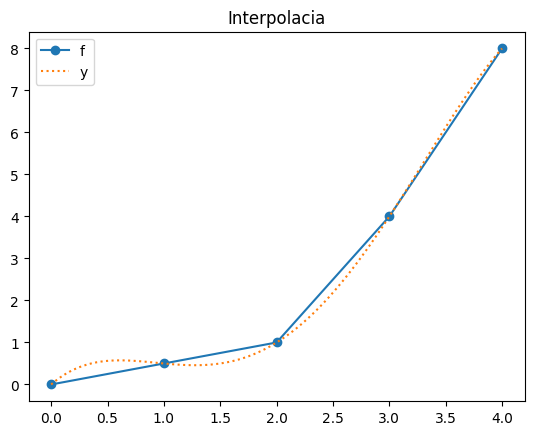

In [233]:
B = [np.pow(t, i) for i in range(len(t))]

A = np.array([
    [np.dot(B[0], B[0]), np.dot(B[1], B[0]), np.dot(B[2], B[0]), np.dot(B[3], B[0]), np.dot(B[4], B[0])],
    [np.dot(B[0], B[1]), np.dot(B[1], B[1]), np.dot(B[2], B[1]), np.dot(B[3], B[1]), np.dot(B[4], B[1])],
    [np.dot(B[0], B[2]), np.dot(B[1], B[2]), np.dot(B[2], B[2]), np.dot(B[3], B[2]), np.dot(B[4], B[2])],
    [np.dot(B[0], B[3]), np.dot(B[1], B[3]), np.dot(B[2], B[3]), np.dot(B[3], B[3]), np.dot(B[4], B[3])],
    [np.dot(B[0], B[4]), np.dot(B[1], B[4]), np.dot(B[2], B[4]), np.dot(B[3], B[4]), np.dot(B[4], B[4])],
])

b = np.array([
    np.dot(f, B[0]),
    np.dot(f, B[1]),
    np.dot(f, B[2]),
    np.dot(f, B[3]),
    np.dot(f, B[4])]
)

C = np.linalg.solve(A, b)

fp = sum([np.dot(C[i], B[i]) for i in range(len(t))])
# chyba = np.sqrt(sum(np.pow(f - fp, 2)))

df = pd.DataFrame([t, f, fp, f-fp, np.pow(f-fp, 2)], index=["t", "f", "fp", "f-fp", "^2"])
display(df)
# print(f"c0 = {c0}\nc1 = {c1}\nc2 = {c2}")
# print(f"chyba = {chyba} ({chyba/len(f)} per prvok)")

B = [np.pow(tt, i) for i in range(len(tt))]
y = sum([np.dot(C[i], B[i]) for i in range(len(t))])

plt.plot(f, "o-", label="f")
# plt.plot(fp, label="fp")
plt.plot(tt, y, ":", label="y")
plt.title("Interpolacia")
_ = plt.legend()


---

## Regresie

### Linearna regresia

$y(t) = c_1 + c_2t = c_3t^6 + c_4e^{-2t} + c_5\sin(\frac{\pi}{2} \cdot t)$

### Logaritmicka regresia

#### $y(t) = a \cdot \ln(bt)$

$y(t) = c_1 + c_2 \cdot \ln(t)$

$c_1 = a \cdot \ln(b)$

$c_2 = a$

### Exponencialna regresia

#### $y(t) = a \cdot e^{bt}$

$\ln(y(t)) = c_1 + c_2 \cdot \ln(t)$

$c_1 = \ln(a)$

$c_2 = b$

### Mocninova regresia

#### $y(t) = a \cdot t^b$

$\ln(y(t)) = c_0 + c_1 \cdot \ln(t)$

$c_1 = \ln(a)$

$c_2 = b$

### Regresia racionalnou funkciou

#### $y(t) = \dfrac{at}{b + t}$

$\dfrac{1}{y(t)} = c_1 + c_2 \cdot \dfrac{1}{t}$

$c_1 = \dfrac{1}{a}$

$c_2 = \dfrac{b}{a}$
